In [1]:
## In this tutorial script, we will initialize a Drone_Data and Corr_Data class.
## Then, we will combine them into a CONCAT class and use some plotting functions.
## Be sure to install the python package according to the instructions in the readme prior to running!

## First, import general packages for running python analysis:
import os
import numpy as np
from matplotlib.pyplot import *
import h5py
import datetime
import pytz

## Then, import the beamcals module packages and initialize 'gbosite' class:
from beamcals import corr
from beamcals import concat
from beamcals import drone
from beamcals import bicolog
import beamcals.plotting_utils as pu
import beamcals.fitting_utils as fu
import beamcals.geometry_utils as gu
import beamcals.time_utils as tu
from beamcals.sites import site
gbosite=site.site('../beamcals/beamcals/sites/GBO_config.npz')

In [2]:
## Read in the Drone_Data class, lets choose "FLY653.csv":
## We'll use the minimum necessary input parameters:
    # FLYTAG - the filename of the selected file
    # Drone_Directory - the directory location containing the file
    # site_class - the site config class, which we defined above as 'gbosite'
## The following input parameters will be left to their default setting:
    # skip_rows=range(500).tolist() - this is how many rows are skipped to omit NAN values.
dronedir='/hirax/all_drone_data/datcon_csv/'
dronetest=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY653.csv',site_class=gbosite)

Initializing drone data via datcon_csv routine: FLY653.csv
 --> Skipping rows 1 to 499 to eliminate NAN values
 --> Attempting to load position data from RTK
 ----> RTK Data not found for this data file...
 --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
 --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
 --> generating dish and receiver line of sight coordinates.


In [3]:
## Read in the Corr_Data class, corresponding to the "FLY653.csv" file.
## We'll use the minimum necessary input parameters:
    # Data_Directory - the directory location containing the correlator files
    # Gain_Directory - the directory location containing the gain file
    # site_class - the site config class, which we defined above as 'gbosite'
## The following input parameters will be left to their default setting:
    # Data_File_Index=None - data files to use (default --> all files)
    # Load_Gains=True
    # Fix_Gains=False - should we apply a fixed gain in each channel? (only use when known from config)
    # Apply_Gains=True - if set to False, the V arrays will contain uncalibrated "raw" data
    # Gain_Params=[1.0, 24.0] - if applying a fixed gain, the gain in each channel will be: 1.0*(10**24.0)
    # fbounds=[0, -1] - what frequency bounds should we pull from the visibility matrix?
datadir='/hirax/GBO_Oct_2021/TONE_ACQ/20211022T215446Z_yale_drone/corr/20211022T215459Z/'
gaindir='/hirax/GBO_Oct_2021/TONE_ACQ/digital_gains/20211022T215446Z_yale_drone_yale_digitalgain/'
corrtest=corr.Corr_Data(Data_Directory=datadir,Gain_Directory=gaindir,site_class=gbosite)

Initializing Correlator Class using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211022T215446Z_yale_drone/corr/20211022T215459Z/
 --> Arrays initialized with shape (108, 256, 1023, 16)
Assigning array values by reading in data files:
 --> Loading File: 0107/0107

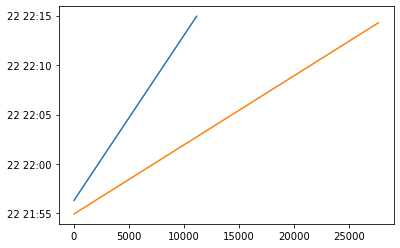

In [4]:
## Just to illustrate that these two files correspond to the same times, let's plot their datetime arrays:
plot(dronetest.t_arr_datetime)
plot(corrtest.t_arr_datetime)

In [5]:
## Since we know the data are from the same time we can combine them with the Concat_Class:
concattest=concat.CONCAT(CORRDATCLASS=corrtest,DRONEDATCLASS=dronetest)

Initializing CONCAT CLASS using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211022T215446Z_yale_drone/corr/20211022T215459Z/
 --> FLY653.csv
Interpolating drone coordinates for each correlator timestamp:
  --> correlator timestamp axis contains 25685 elements
  --> drone timestamp axis contains 11138 elements


In [21]:
## Use plotting functions to produce a waterfall plot of the Concat_Class:
#pu.Plot_Waterfalls(concattest)

In [22]:
## Use plotting functions to produce a time series plot of the Concat_Class, specify t and f bounds:
#pu.Plot_Time_Series(concattest,tbounds=[8000,20000],freqlist=[200,400,700,900])

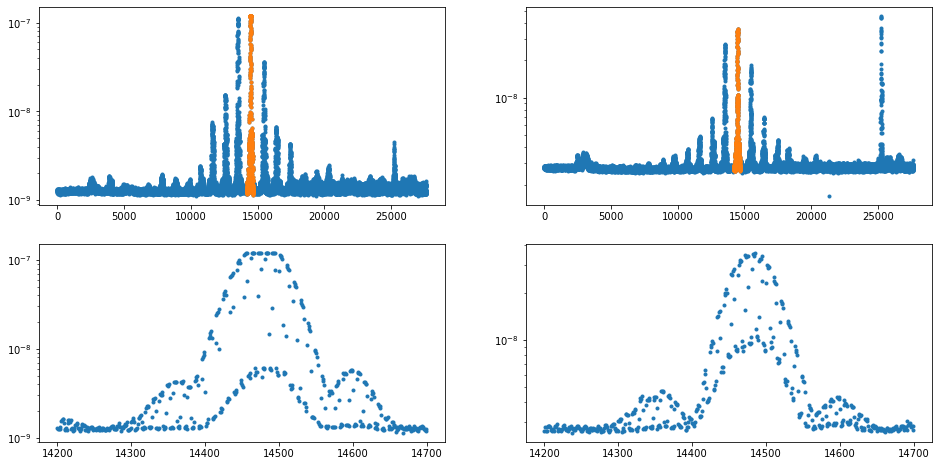

In [23]:
## Let's find the time bounds for a central transit, and examine those bounds when we solve for the source pulses:
tlb,tub=[14200,14700]
find=900

fig=figure(figsize=(16,8))
for i in range(concattest.n_channels)[:2]:
    ax1=fig.add_subplot(2,2,i+1)
    ax2=fig.add_subplot(2,2,i+3)
    ax1.semilogy(concattest.t_index[:],concattest.V[:,find,concattest.chmap[i]],'.')
    for ax in [ax1,ax2]:
        ax.semilogy(concattest.t_index[tlb:tub],concattest.V[tlb:tub,find,concattest.chmap[i]],'.')

/home/tyndall/anaconda3/lib/python3.8/site-packages/dronepkg/concat.py:107: RuntimeWarning: invalid value encountered in true_divide
  normminsubdata=minsubdata/np.nanmax(minsubdata)
/home/tyndall/anaconda3/lib/python3.8/site-packages/dronepkg/concat.py:118: RuntimeWarning: All-NaN slice encountered
  maxPrind=np.where(Pr_arr[i,:]==np.nanmax(Pr_arr[i,:]))[0][0]
/home/tyndall/anaconda3/lib/python3.8/site-packages/dronepkg/concat.py:107: RuntimeWarning: invalid value encountered in true_divide
  normminsubdata=minsubdata/np.nanmax(minsubdata)
/home/tyndall/anaconda3/lib/python3.8/site-packages/dronepkg/concat.py:118: RuntimeWarning: All-NaN slice encountered
  maxPrind=np.where(Pr_arr[i,:]==np.nanmax(Pr_arr[i,:]))[0][0]


Maximum Pearson_R Correlations:
  --> t_indices = [435. 435. 414. 406.  nan 417. 413. 414. 427. 432. 438. 438. 432.  nan
 417. 405.]
  --> t_offsets = [-0.22582583 -0.22582583 -0.23423423 -0.23743744         nan -0.23303303
 -0.23463463 -0.23423423 -0.22902903 -0.22702703 -0.22462462 -0.22462462
 -0.22702703         nan -0.23303303 -0.23783784]
Selecting global time offset:
  --> global_t_offset = -0.2100310310
Finding relevant pulsing indices and checking for overlaps:
  --> on/off ind intersection: []
  --> on/span ind intersection: []
  --> off/span ind intersection: []


/home/tyndall/anaconda3/lib/python3.8/site-packages/dronepkg/concat.py:165: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  tight_layout()


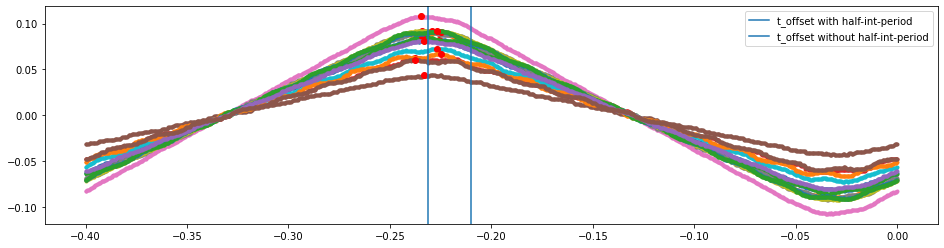

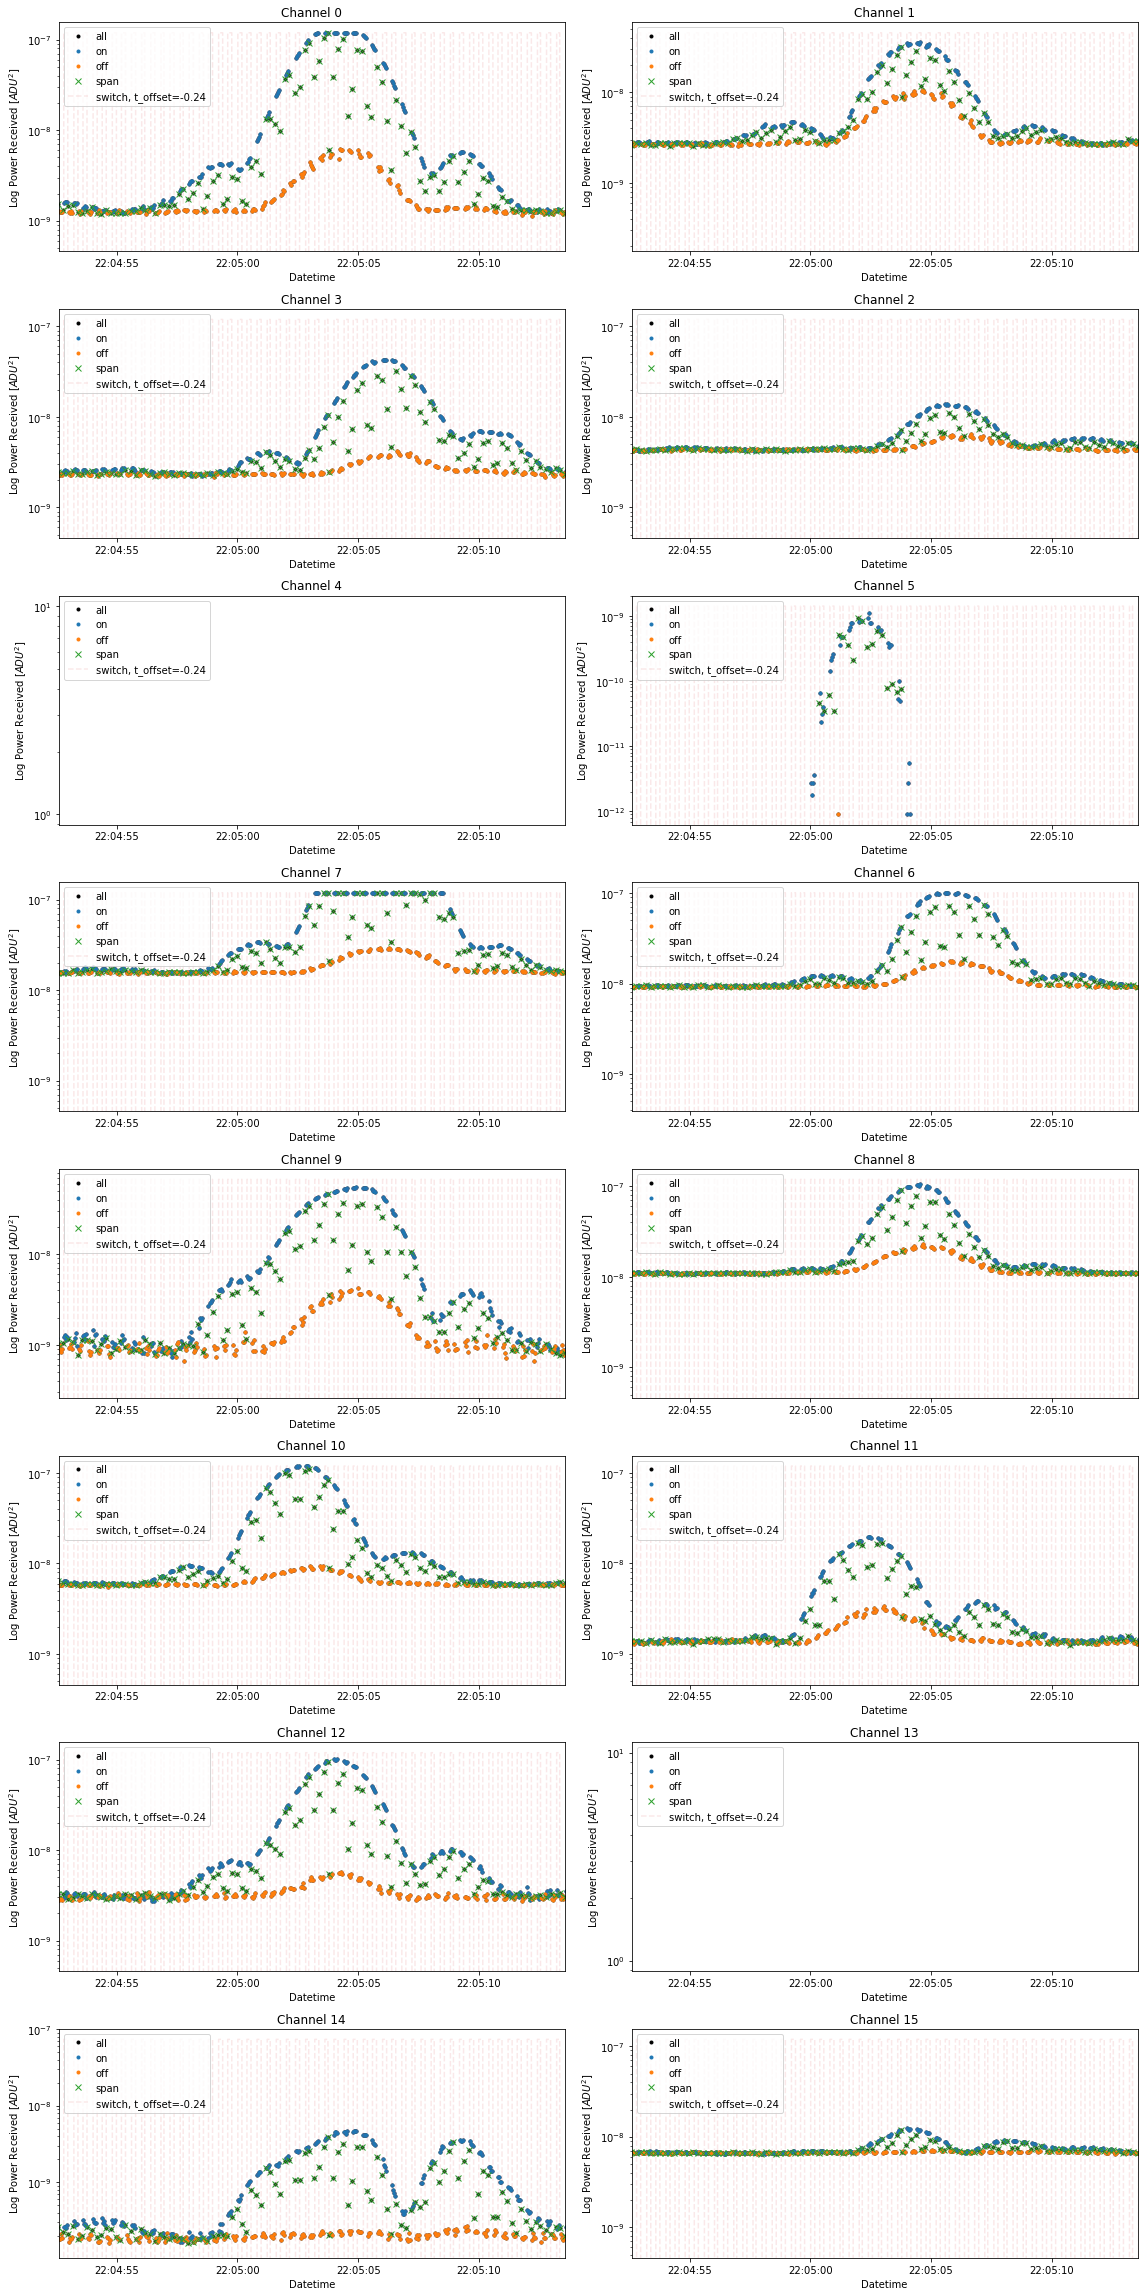

In [24]:
## Let's use the Extract_Source_Pulses and Perform_Background_Subtraction functions:
    # The Period and Dutycycle options are known beforehand, and given in microseconds.
    # The t_bounds option just determines the plot bounds, not the solving routine:
concattest.Extract_Source_Pulses(Period=0.4e6,Dutycycle=0.2e6,t_bounds=[14200,14700])

## Let's do background subtraction: creates computed background (V_bg) and background-subtracted (V_bgsub) arrays:
    # window_size=5 - this is 1/2 the width of the 'index window' across which the background is averaged.
concattest.Perform_Background_Subtraction()

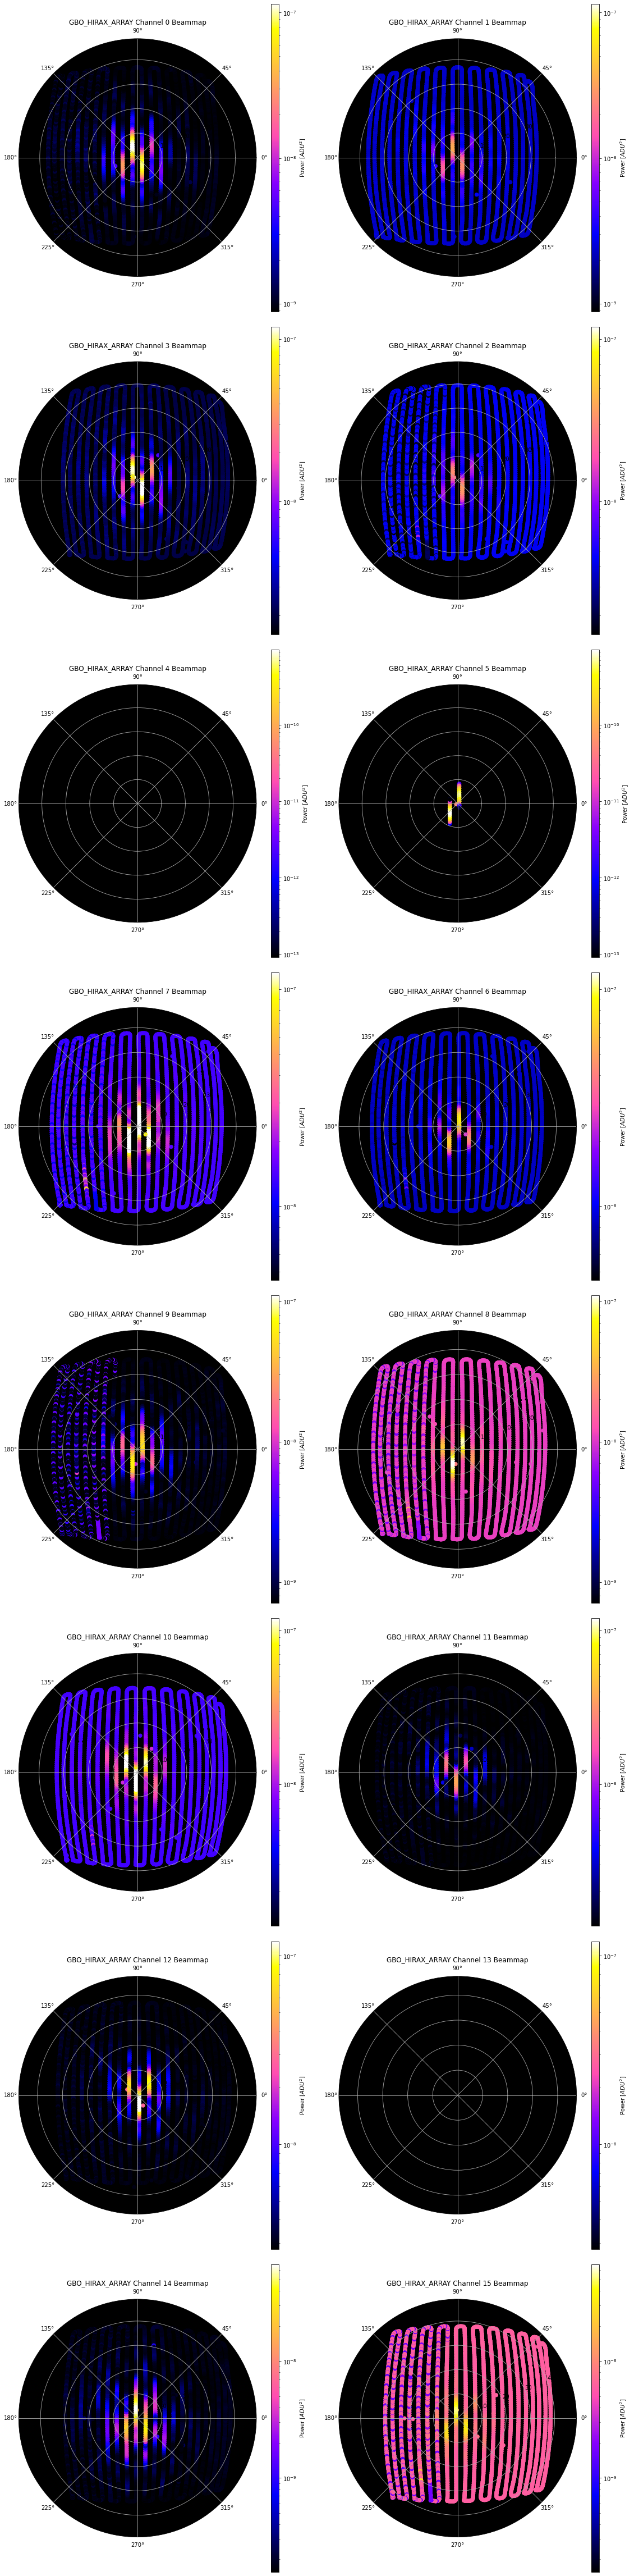

In [37]:
pu.Plot_Beammap(concattest,coord_args='Pol',pulse_args='on',t_bounds=[4400,25000],f_bounds=[900,910],cbounds=[])